In [1]:
import cv2

In [2]:
import numpy as np
import os

In [3]:
import matplotlib.pyplot as plt

In [5]:
import glob
import pybboxes as pbx
import os
import cv2
import matplotlib.pyplot as plt

files = glob.glob("get/*")
images_path = glob.glob("test/*.jpg")





def map_first_lines(file_list):
    
    
    for file in file_list:
        with open(file) as fd:
            yield fd.readline()





for f in  map_first_lines(files):
    pred=f[1:].split() 
    new_list = []
    for item in pred:
        new_list.append(float(item))
    
    for image in images_path:
        img=cv2.imread(image)
    gt=pbx.convert_bbox(new_list, from_type="yolo", to_type="voc",image_size=(1280,720))
    print(gt)

   


    
        
    


(4, 295, 256, 547)
(19, 301, 274, 556)
(78, 288, 326, 536)
(56, 274, 335, 553)
(93, 275, 372, 554)
(116, 267, 391, 542)
(152, 276, 415, 539)
(163, 282, 430, 549)
(181, 269, 453, 541)
(199, 268, 468, 537)
(216, 264, 497, 545)
(245, 277, 511, 543)
(270, 278, 538, 546)
(302, 275, 574, 547)
(314, 262, 596, 544)
(355, 272, 615, 532)
(353, 260, 634, 541)
(375, 262, 648, 535)
(388, 248, 683, 543)
(436, 245, 724, 533)
(452, 238, 746, 532)
(469, 240, 765, 536)
(488, 251, 769, 532)
(518, 236, 823, 541)
(558, 247, 843, 532)
(579, 244, 874, 539)
(592, 248, 892, 548)
(621, 239, 921, 539)
(640, 222, 958, 540)
(667, 236, 965, 534)
(669, 230, 1003, 564)
(707, 235, 1010, 538)
(730, 227, 1042, 539)
(749, 236, 1047, 534)
(781, 229, 1087, 535)
(804, 228, 1130, 554)
(811, 223, 1144, 556)
(866, 212, 1190, 536)


[160, 106, 109, 60]
[209, 101, 110, 63]
[210, 101, 110, 70]
[171, 106, 103, 65]
[39, 119, 96, 67]
[181, 106, 102, 61]
[125, 124, 84, 69]
[317, 88, 136, 62]
[165, 119, 86, 71]
[3, 117, 104, 59]
[60, 114, 104, 50]
[246, 108, 96, 65]
[326, 100, 111, 65]
[21, 123, 92, 52]
[246, 112, 90, 84]
[137, 113, 105, 62]
[279, 94, 122, 59]
[290, 97, 118, 59]
[38, 121, 91, 64]
[74, 122, 88, 67]


C:\Users\Asus\AppData\Local\Temp\ipykernel_13484\2340855503.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


[207, 109, 94, 63]
[156, 113, 106, 49]
[112, 119, 93, 80]
[231, 101, 113, 60]
[192, 93, 126, 64]
[98, 113, 98, 54]
[264, 106, 99, 74]
[78, 121, 89, 73]
[332, 99, 114, 93]
[293, 98, 113, 67]
[30, 121, 98, 47]
[101, 110, 111, 62]
[71, 118, 89, 59]
[10, 132, 72, 63]
[306, 95, 120, 63]
[347, 89, 134, 77]
[262, 109, 97, 72]
[369, 78, 138, 64]
[329, 98, 114, 70]
[114, 117, 89, 52]


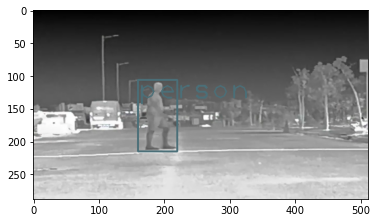

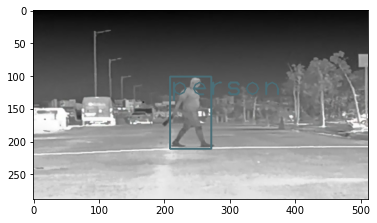

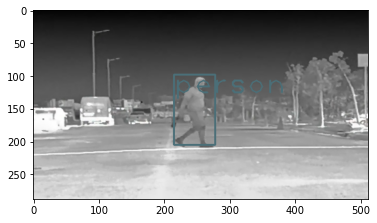

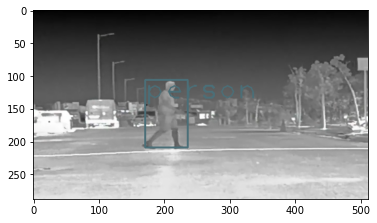

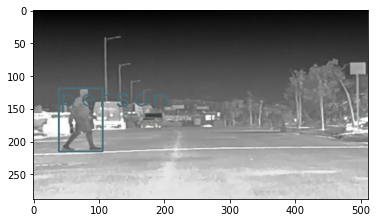

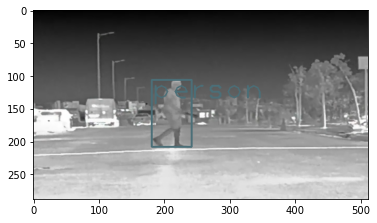

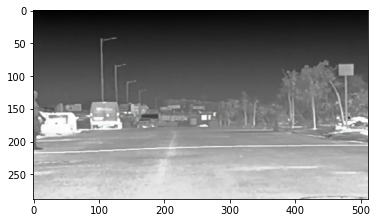

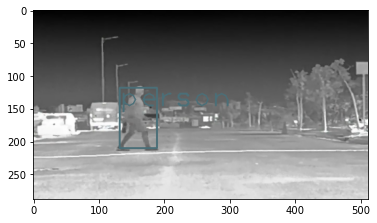

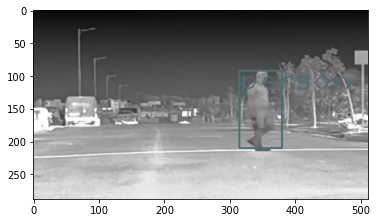

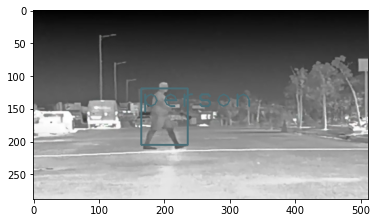

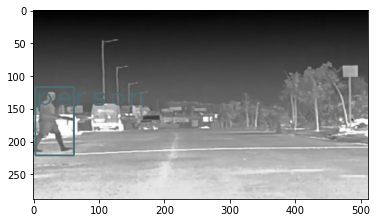

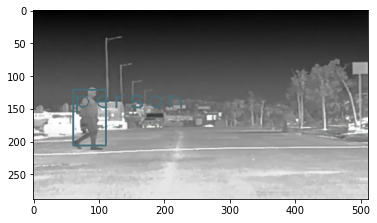

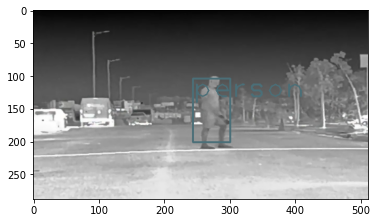

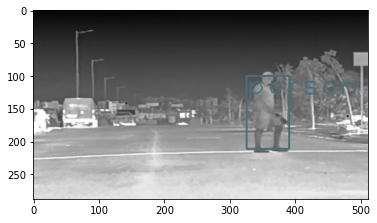

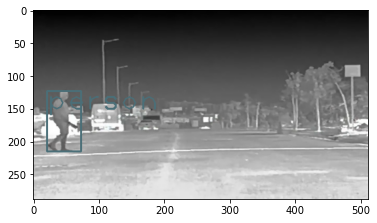

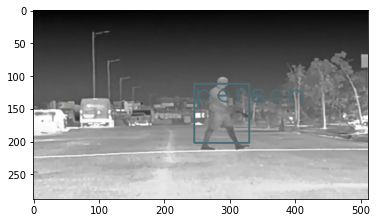

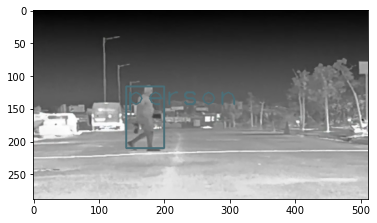

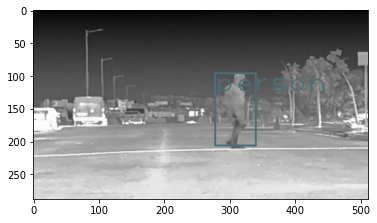

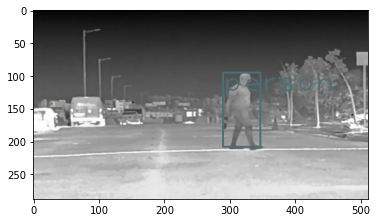

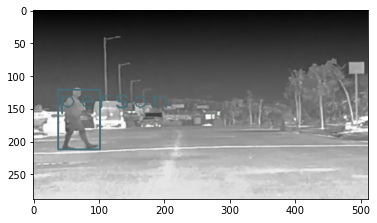

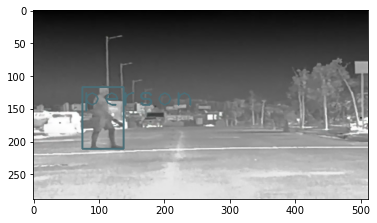

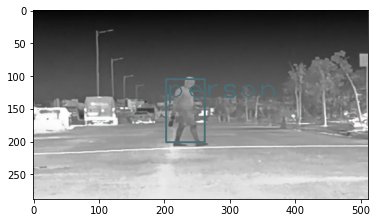

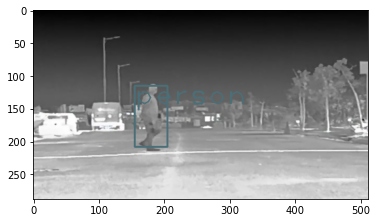

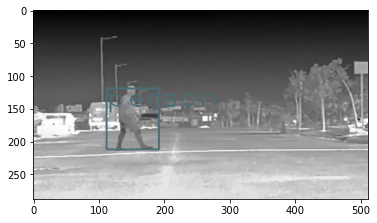

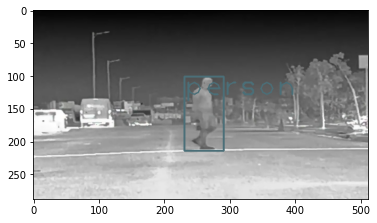

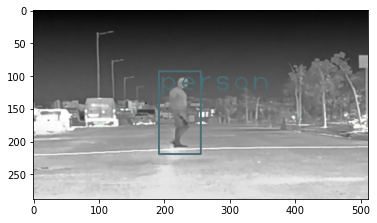

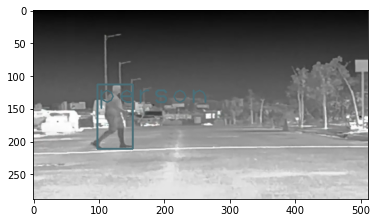

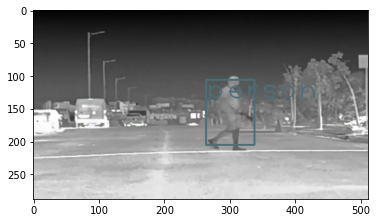

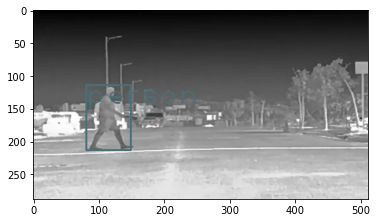

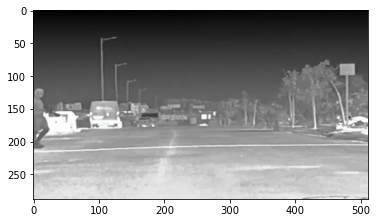

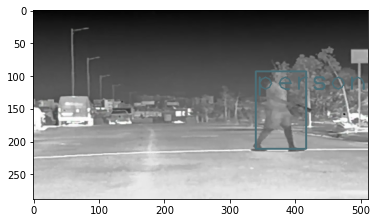

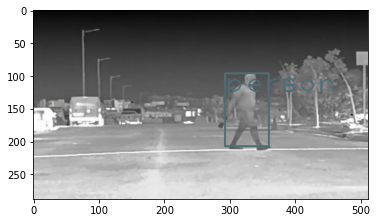

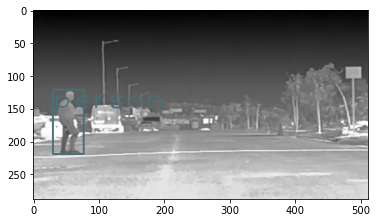

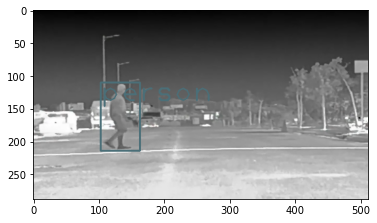

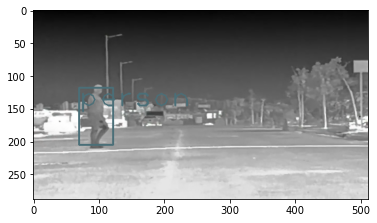

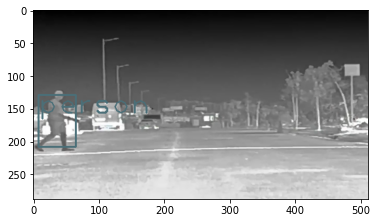

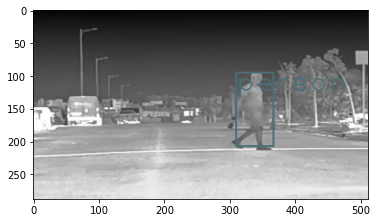

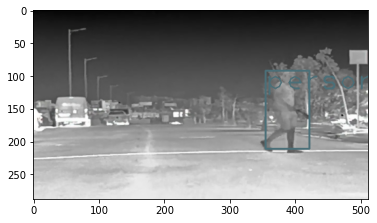

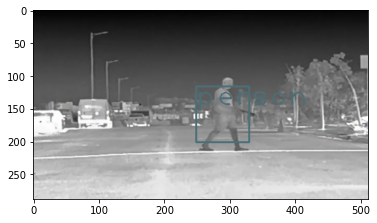

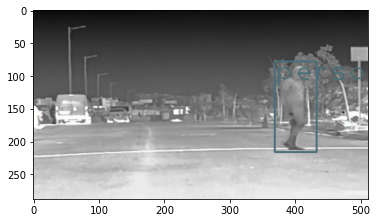

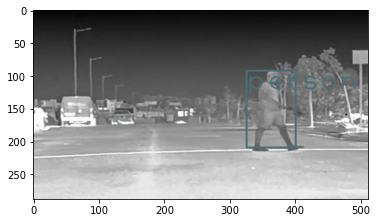

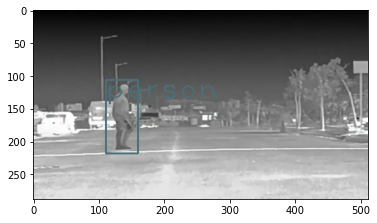

In [35]:
import cv2
import numpy as np
import glob
import random


# Load Yolo
net = cv2.dnn.readNet("yolov3_training_last.weights", "yolov3_testing.cfg")

# Name custom object
classes = ["person"]

# Images path
images_path = glob.glob("teste/*.jpg")



layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Insert here the path of your images
random.shuffle(images_path)
# loop through all the images
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
               
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                prd=[x,y,h,w]
                

                           

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 2)
            
            print(prd)
            
            
            
            
   
    
   
    
     
            
            
            
            

    plt.figure()
    plt.imshow(img) 
    

#cv2.destroyAllWindows()

In [14]:
from collections import namedtuple
import numpy as np
import cv2
import matplotlib.pyplot as plt



def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou


[[[  6   6   6]
  [  6   6   6]
  [  6   6   6]
  ...
  [  8   8   8]
  [  8   8   8]
  [  8   8   8]]

 [[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [  8   8   8]
  [  8   8   8]
  [  8   8   8]]

 [[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [  8   8   8]
  [  8   8   8]
  [  8   8   8]]

 ...

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [223 223 223]
  [223 223 223]
  [223 223 223]]

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [223 223 223]
  [223 223 223]
  [223 223 223]]

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [223 223 223]
  [223 223 223]
  [223 223 223]]]: 0.0000
[[[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]]

 [[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 11  11  11]]

 [[  8   8   8]
  [  8   8   8]
  [  8   8   8]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 11  11  11]]

 ...

 [[231 231 231]
  [231 231 231]
  [232 232 2

C:\Users\Asus\AppData\Local\Temp\ipykernel_13484\3823703586.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


[[[  4   4   4]
  [  4   4   4]
  [  4   4   4]
  ...
  [  7   7   7]
  [  7   7   7]
  [  7   7   7]]

 [[  4   4   4]
  [  4   4   4]
  [  4   4   4]
  ...
  [  7   7   7]
  [  7   7   7]
  [  7   7   7]]

 [[  4   4   4]
  [  4   4   4]
  [  4   4   4]
  ...
  [  7   7   7]
  [  7   7   7]
  [  7   7   7]]

 ...

 [[231 231 231]
  [230 230 230]
  [230 230 230]
  ...
  [224 224 224]
  [223 223 223]
  [223 223 223]]

 [[230 230 230]
  [230 230 230]
  [230 230 230]
  ...
  [226 226 226]
  [224 224 224]
  [224 224 224]]

 [[229 229 229]
  [229 229 229]
  [229 229 229]
  ...
  [228 228 228]
  [226 226 226]
  [225 225 225]]]: 0.0000
[[[  4   4   4]
  [  4   4   4]
  [  4   4   4]
  ...
  [  7   7   7]
  [  7   7   7]
  [  7   7   7]]

 [[  4   4   4]
  [  3   3   3]
  [  3   3   3]
  ...
  [  7   7   7]
  [  7   7   7]
  [  7   7   7]]

 [[  4   4   4]
  [  4   4   4]
  [  4   4   4]
  ...
  [  7   7   7]
  [  7   7   7]
  [  7   7   7]]

 ...

 [[219 219 219]
  [219 219 219]
  [220 220 2

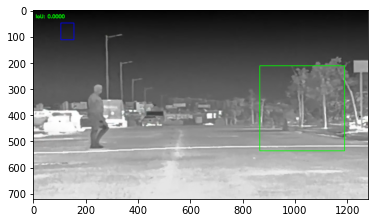

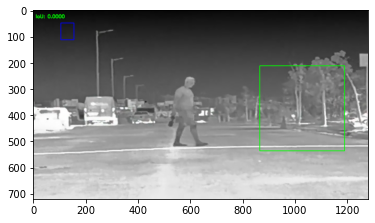

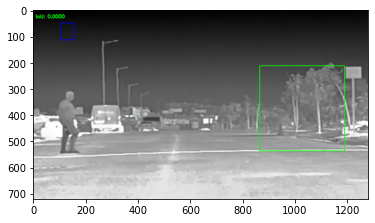

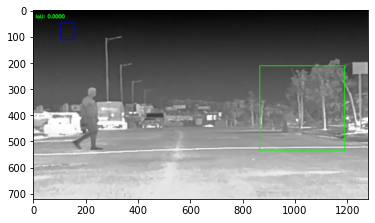

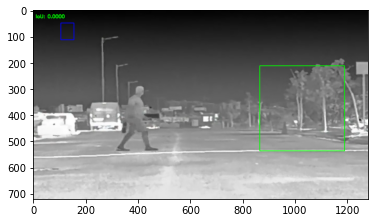

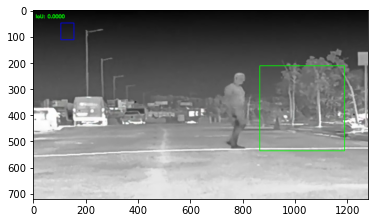

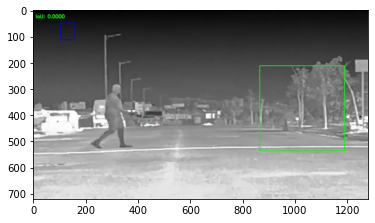

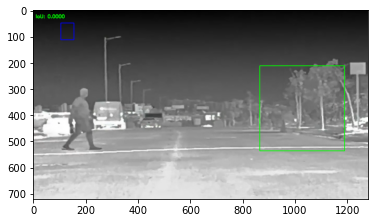

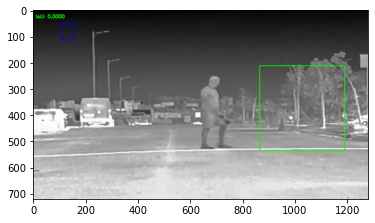

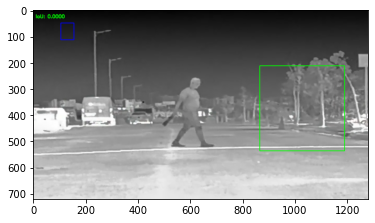

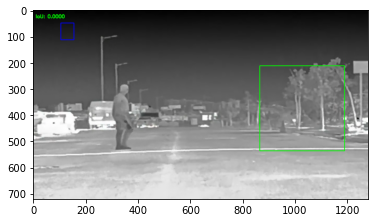

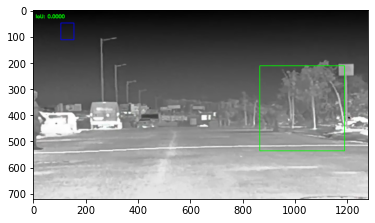

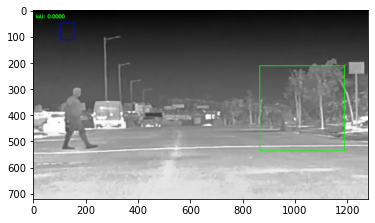

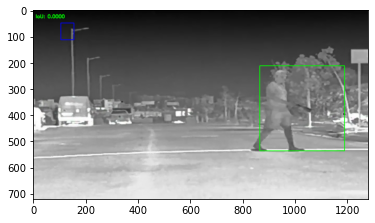

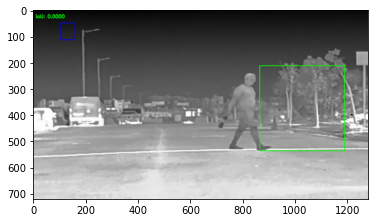

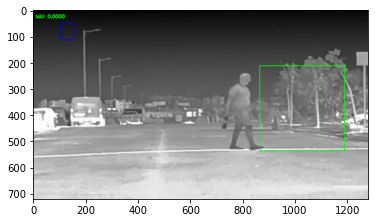

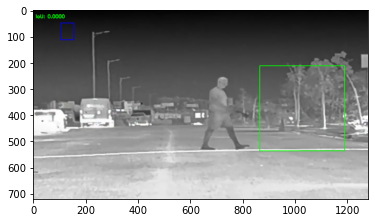

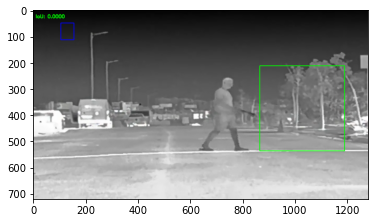

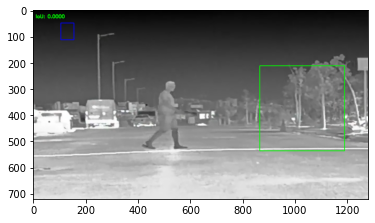

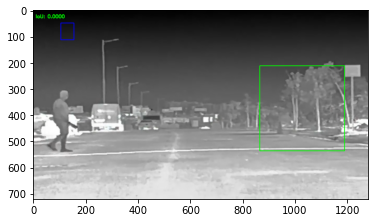

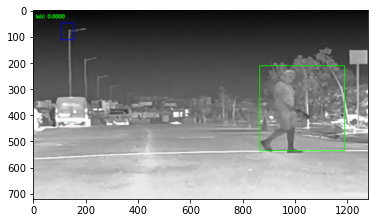

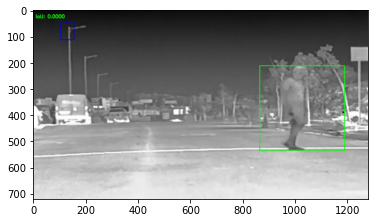

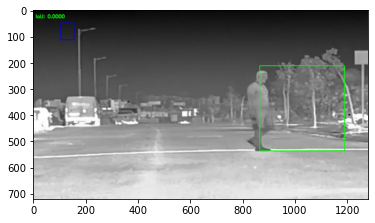

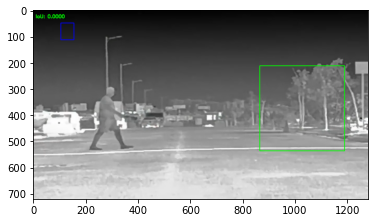

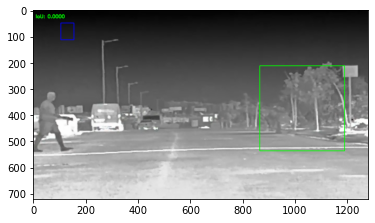

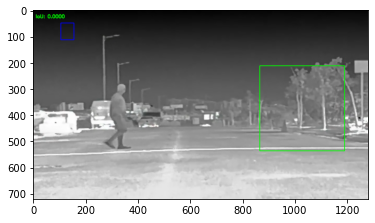

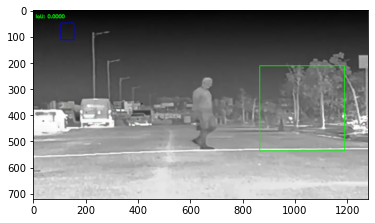

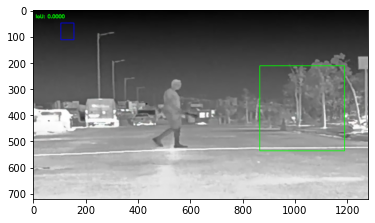

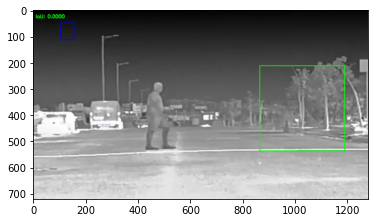

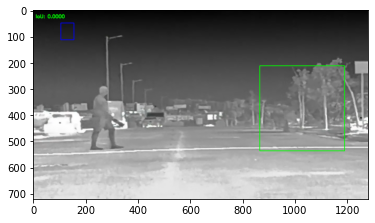

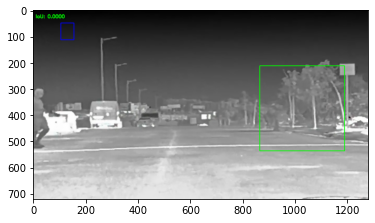

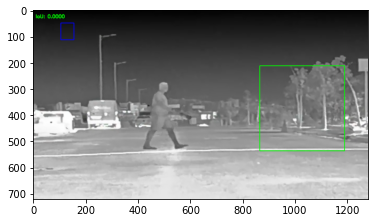

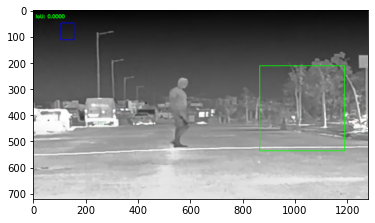

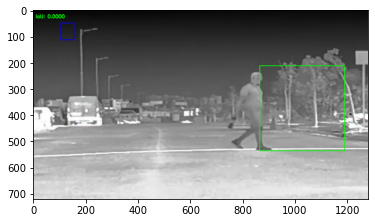

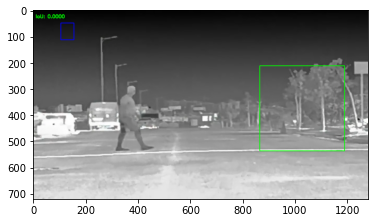

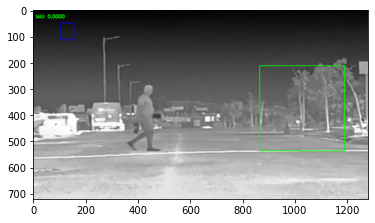

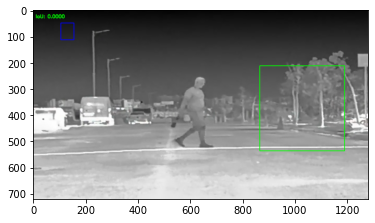

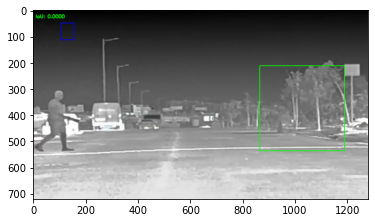

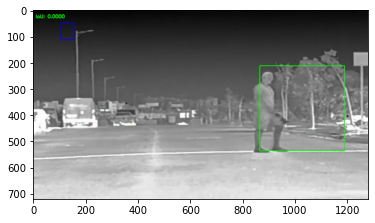

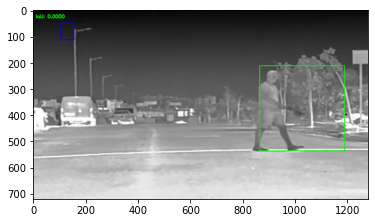

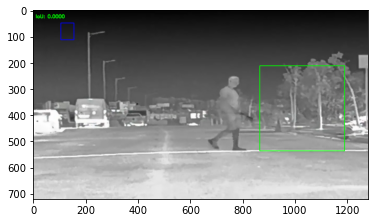

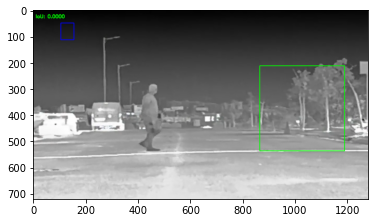

In [88]:
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    
    z=((img),list(gt), (prd))
    
    cv2.rectangle(img, tuple(z[1][:2]), tuple(z[1][2:]), (0, 255, 0), 2)
    cv2.rectangle(img, tuple(z[2][:2]), tuple(z[2][2:]), (0, 0, 255), 2)

    # compute the intersection over union and display it
    iou = bb_intersection_over_union(z[1], z[2])
    cv2.putText(img, "IoU: {:.4f}".format(iou), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    print("{}: {:.4f}".format(img, iou))
   
    # show the output image
   
    
    plt.figure()
    plt.imshow(img)    